In [90]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [91]:
df1 = pd.read_csv('2-wheeler-EV-bikewale.csv')
df2 = pd.read_csv('4-wheeler-EV-cardekho.csv')
df3 = pd.read_csv('4-wheeler-EV-carwale.csv')

In [92]:
df1.head(5)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [93]:
#df1 = df1.drop('Ridden for', axis=1)
#df1 = df1.drop('Used it for', axis = 1)
#df1 = df1.drop('Owned for', axis = 1)
df1 = df1.drop('Visual Appeal', axis = 1)
df1 = df1.drop('Reliability',  axis = 1)
df1 = df1.drop('Service Experience', axis = 1)
df1 = df1.drop('Extra Features', axis = 1)
df1 = df1.drop('Maintenance cost', axis = 1)
df1 = df1.drop('Value for Money', axis = 1)

In [94]:
df1 = df1.rename(columns={'Model Name': 'Model'})
df1.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Performance', 'Comfort', 'Model'],
      dtype='object')

In [95]:
df1

,review,Used it for,Owned for,Ridden for,rating,Performance,Comfort,Model
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,NaN,4.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,NaN,5.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,NaN,3.0,TVS iQube
...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,NaN,2.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,4.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,NaN,4.0,Gemopai Ryder


In [132]:
df2.head(5)

,review,rating,model
0,Review 3,3,Model C
1,Review 4,2,Model D


In [97]:
df2 = df2.drop('Attributes Mentioned', axis = 1)

In [98]:
df2 = df2.rename(columns={'Review': 'review'})
df2.columns

Index(['review', 'Rating', 'Model'], dtype='object')

In [99]:
df2

,review,Rating,Model
0,Using it for the last 1 month. It's a gentle-l...,5.0,hyundai kona
1,"In the beginning, the car performed excellentl...",1.0,hyundai kona
2,Hyundai is the best performing company beating...,5.0,hyundai kona
3,The car offers reasonable performance in this ...,5.0,hyundai kona
4,Hyundai Kona - First electric car of India was...,4.0,hyundai kona
...,...,...,...
135,It's one of the best EVs of course after Tesla...,4.5,BYD E6
136,A stylish and comfortable EV with great featur...,4.5,BYD E6
137,Was using KIA Seltos automatic and Nexon EV. R...,4.5,BYD E6
138,BYD car really looking very nice. Outlook is f...,4.5,BYD E6


In [100]:
df3.head(5)

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [101]:
df3 = df3.drop( 'Exterior', axis = 1)
df3 = df3.drop('Fuel Economy', axis = 1)
df3 = df3.drop('Value for Money', axis = 1)
df3 = df3.drop('Condition', axis = 1)
df3 = df3.drop('driven', axis = 1)

In [102]:
df3 = df3.rename(columns={'Model Name': 'Model'})
df3.columns

Index(['review', 'Comfort', 'Performance', 'rating', 'model_name'], dtype='object')

In [103]:
df3

,review,Comfort,Performance,rating,model_name
0,Superb car like as fantastic as petroleum car....,4.0,5.0,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,0.0,hyundai kona
2,Super happy with it. The car is too good,5.0,5.0,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,5.0,3.0,hyundai kona
...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,4.0,4.0,4.0,tata tigor ev
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,tata tigor ev
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,tata tigor ev
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,5.0,tata tigor ev


In [104]:
# prompt: remove the stop words, symbols ,html tags, number, special characters and reduce number to there base words

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        return ""  # Or any other suitable handling for non-string values

    # Remove HTML tags
    text = re.sub(r'<[^>]+>', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Convert to lowercase and split into words
    words = text.lower().split()

    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join the words back into a string
    return ' '.join(words)

# Apply the clean_text function to the 'Review' column of each DataFrame
df1['review'] = df1['review'].apply(clean_text)
df2['review'] = df2['review'].apply(clean_text)
df3['review'] = df3['review'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
# Assuming you want to tokenize the cleaned 'review' columns in each DataFrame
df1_tokens = df1['review'].apply(lambda text: text.split())
df2_tokens = df2['review'].apply(lambda text: text.split())
df3_tokens = df3['review'].apply(lambda text: text.split())

print("df1_tokens:\n", df1_tokens)
print("\ndf2_tokens:\n", df2_tokens)
print("\ndf3_tokens:\n", df3_tokens)

df1_tokens:
 0      [checked, bike, capacity, km, full, charge, gi...
1      [performance, poor, bike, charging, problem, b...
2      [purchased, april, sale, staff, clueless, new,...
3      [issue, come, scooty, part, available, service...
4      [buy, vehicle, unless, near, tv, iqube, servic...
                             ...                        
839    [scooty, ok, motor, power, le, scooter, power,...
840    [superb, scooty, good, look, many, color, opti...
841    [year, condition, good, year, scooter, stopped...
842    [compare, scooter, best, bike, comfortable, se...
843    [bike, good, segment, use, person, aged, plus,...
Name: review, Length: 844, dtype: object

df2_tokens:
 0      [using, last, month, gentle, looking, beast, p...
1      [beginning, car, performed, excellently, well,...
2      [hyundai, best, performing, company, beating, ...
3      [car, offer, reasonable, performance, range, h...
4      [hyundai, kona, first, electric, car, india, r...
                    

In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Replace 'df1' with the correct DataFrame name if you intended to use one of those
df1['sentiment'] = df1['review'].apply(lambda x: sid.polarity_scores(x)['compound'])  # Use 'review' column if it contains the cleaned reviews
df1['sentiment_category'] = df1['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Repeat for df2 and df3 if needed
df2['sentiment'] = df2['review'].apply(lambda x: sid.polarity_scores(x)['compound'])  # Use 'review' column if it contains the cleaned reviews
df2['sentiment_category'] = df2['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

df3['sentiment'] = df3['review'].apply(lambda x: sid.polarity_scores(x)['compound'])  # Use 'review' column if it contains the cleaned reviews
df3['sentiment_category'] = df3['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


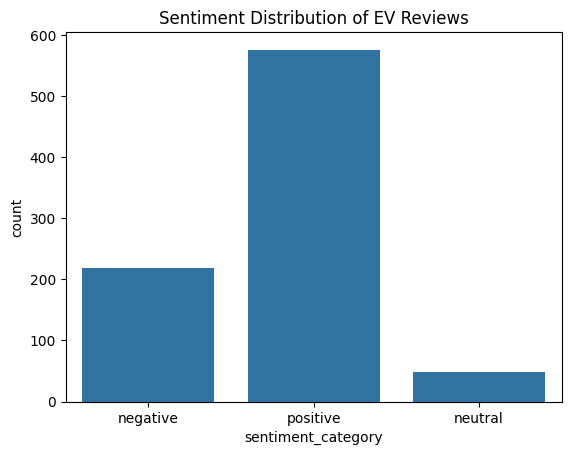

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_category', data=df1)
plt.title('Sentiment Distribution of EV Reviews')
plt.show()

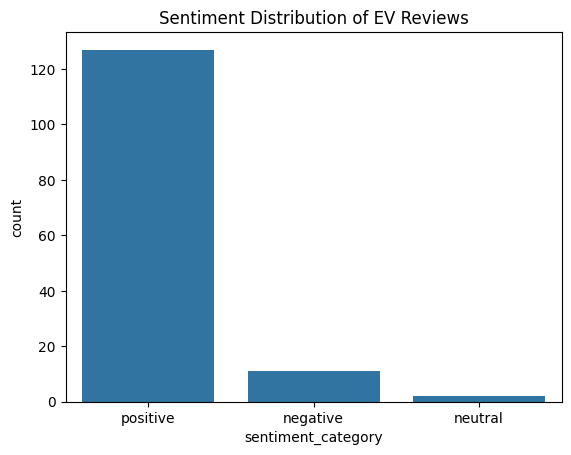

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_category', data=df2)
plt.title('Sentiment Distribution of EV Reviews')
plt.show()

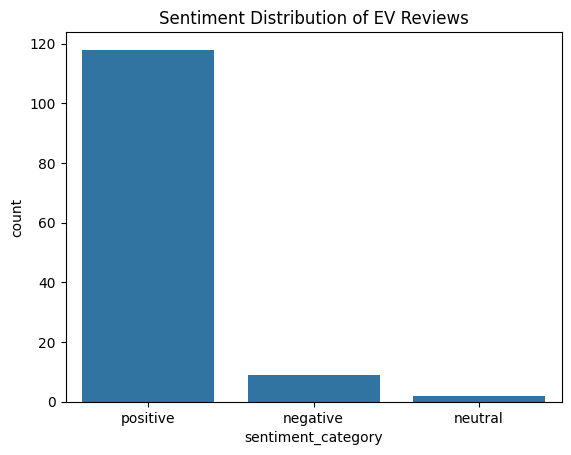

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_category', data=df3)
plt.title('Sentiment Distribution of EV Reviews')
plt.show()

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Replace 'df1' with the correct DataFrame if needed
reviews = df1[['review']]  # Assuming 'review' column contains the original reviews

# Perform text cleaning here if you haven't already (example using a simple cleaning function)
def clean_text(text):
    # Implement your text cleaning logic here (e.g., lowercasing, removing punctuation, etc.)
    return text.lower() # Example cleaning: converting to lowercase

reviews['cleaned_review'] = reviews['review'].apply(clean_text)  # Create a new column with cleaned reviews

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
# Use the correct column name 'cleaned_review' here
tfidf = tfidf_vectorizer.fit_transform(reviews['cleaned_review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf)

# Display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(lda, tfidf_feature_names, 10)

<ipython-input-123-668e351bec02>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['cleaned_review'] = reviews['review'].apply(clean_text)  # Create a new column with cleaned reviews


Topic 0:
kratos informed jupiter invoice failure overpriced govt vfm similar consumer
Topic 1:
bike good km scooter service battery vehicle electric look charge
Topic 2:
theft alarm footrest anti rim compromise ab drls continuously luggage
Topic 3:
important electronic breaking special wish oil tubeless economy gear launching
Topic 4:
usb responding nature climb slope steep rc satisfaction port fix


Visvalization

In [124]:
import pandas as pd

# Example dataframes
df1 = pd.DataFrame({
    'review': ['Review 1', 'Review 2'],
    'rating': [4, 5],
    'Performance': [7, 8],
    'Comfort': [6, 7],
    'Model': ['Model A', 'Model B']
})

df2 = pd.DataFrame({
    'review': ['Review 3', 'Review 4'],
    'Rating': [3, 2],
    'Model': ['Model C', 'Model D']
})

df3 = pd.DataFrame({
    'review': ['Review 5', 'Review 6'],
    'Comfort': [5, 4],
    'Performance': [6, 5],
    'rating': [2, 1],
    'model_name': ['Model E', 'Model F']
})

# Standardize column names
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()

df2.rename(columns={'rating': 'rating', 'model': 'model'}, inplace=True)
df3.rename(columns={'model_name': 'model'}, inplace=True)

# Verify column names
print(df1.columns)
print(df2.columns)
print(df3.columns)


Index(['review', 'rating', 'performance', 'comfort', 'model'], dtype='object')
Index(['review', 'rating', 'model'], dtype='object')
Index(['review', 'comfort', 'performance', 'rating', 'model'], dtype='object')


In [125]:
# Merge dataframes
merged_df = pd.concat([df1, df2, df3], ignore_index=True, sort=False)

# Verify merged dataframe
print(merged_df)

     review  rating  performance  comfort    model
0  Review 1       4          7.0      6.0  Model A
1  Review 2       5          8.0      7.0  Model B
2  Review 3       3          NaN      NaN  Model C
3  Review 4       2          NaN      NaN  Model D
4  Review 5       2          6.0      5.0  Model E
5  Review 6       1          5.0      4.0  Model F


In [126]:
# Fill missing values
merged_df.fillna({'performance': merged_df['performance'].mean(),
                  'comfort': merged_df['comfort'].mean(),
                  'rating': merged_df['rating'].mean()}, inplace=True)

# Verify filled dataframe
print(merged_df)


     review  rating  performance  comfort    model
0  Review 1       4          7.0      6.0  Model A
1  Review 2       5          8.0      7.0  Model B
2  Review 3       3          6.5      5.5  Model C
3  Review 4       2          6.5      5.5  Model D
4  Review 5       2          6.0      5.0  Model E
5  Review 6       1          5.0      4.0  Model F


In [134]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for clustering
features = ['rating', 'visual_appeal', 'reliability', 'performance', 'service_experience',
            'extra_features', 'comfort', 'maintenance_cost', 'value_for_money', 'exterior', 'fuel_economy']

# Ensure these features exist in the merged dataframe
features = [feature for feature in features if feature in merged_df.columns]

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(merged_df[features])

# Verify the standardized data
print(X)


[[ 0.86824314  0.54772256  0.54772256]
 [ 1.61245155  1.64316767  1.64316767]
 [ 0.12403473  0.          0.        ]
 [-0.62017367  0.          0.        ]
 [-0.62017367 -0.54772256 -0.54772256]
 [-1.36438208 -1.64316767 -1.64316767]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

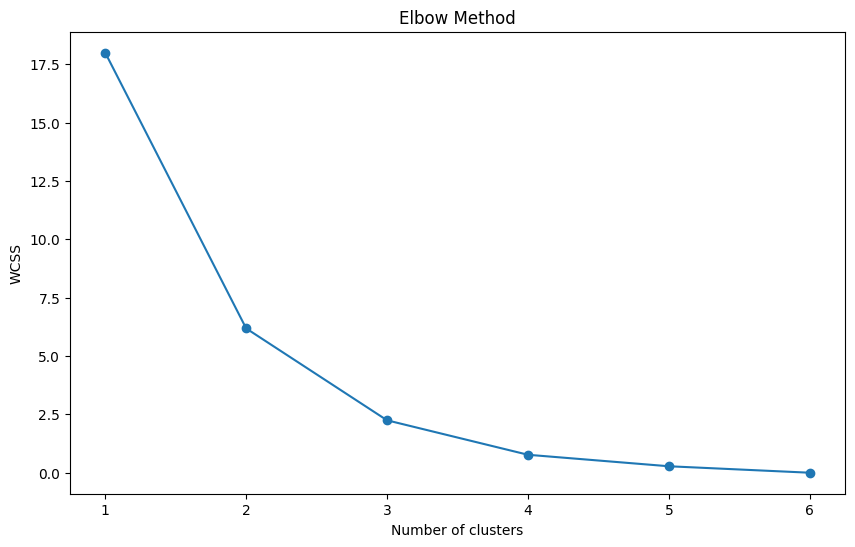

     review  rating  performance  comfort    model  Cluster
0  Review 1       4          7.0      6.0  Model A        1
1  Review 2       5          8.0      7.0  Model B        1
2  Review 3       3          6.5      5.5  Model C        2
3  Review 4       2          6.5      5.5  Model D        2
4  Review 5       2          6.0      5.0  Model E        2
5  Review 6       1          5.0      4.0  Model F        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [137]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, min(11, X.shape[0] + 1)):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, min(11, X.shape[0] + 1)), wcss, marker='o')  # Adjust the x-axis range accordingly
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the merged dataframe
merged_df['Cluster'] = clusters

# Verify the dataframe with cluster labels
print(merged_df)
